### Edgar Moises Hernandez-Gonzalez
#### 27/11/19-10/02/20
#### Clasificacion de imagenes motoras en EEG con CNN-1D + LSTM o CNN-1D + GRU
##### Caracteristicas = alfa de C3 y C4
##### 5 ejecuciones independientes

#### CNN-1D + LSTM
##### Sujeto 1
##### Accuracy = 42.01%
##### Kappa = 0.2269

#### CNN-1D + GRU
##### Sujeto 1
##### Accuracy = 36.81%
##### Kappa = 0.1574

In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [0]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 2, 255))
x_test = x_test.reshape((n_samples_test, 1, 2, 255))

print(x_train.shape)
print(x_test.shape)

(288, 1, 2, 255)
(288, 1, 2, 255)


In [0]:
x_train = np.transpose(x_train, (0,1,3,2))
x_test = np.transpose(x_test, (0,1,3,2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 255, 2)
(288, 1, 255, 2)


In [0]:
def CNN_1D_LSTM():
  model = Sequential()
  model.add(TimeDistributed(Conv1D(16, 64, activation='relu'), input_shape=(None,255,2)))
  model.add(Dropout(0.5))
  model.add(TimeDistributed(Flatten()))
  model.add(LSTM(8))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
def CNN_1D_GRU():
  model = Sequential()
  model.add(TimeDistributed(Conv1D(16, 64, activation='relu'), input_shape=(None,255,2)))
  model.add(Dropout(0.5))
  model.add(TimeDistributed(Flatten()))
  model.add(GRU(8))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
288/288 - 0s - loss: 1.8329 - acc: 0.3611
kappa:  0.14814814814814814
f1: 0.36036869596000004
confusion matrix:
 [[23 30  8 11]
 [22 28  9 13]
 [14 12 23 23]
 [13  9 20 30]]


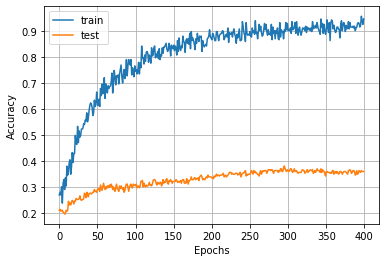

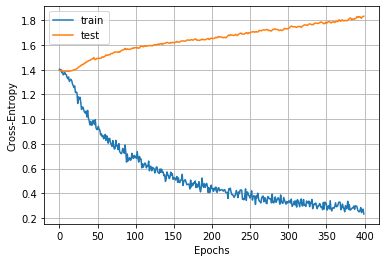

Iteration: 2
288/288 - 0s - loss: 1.8486 - acc: 0.3438
kappa:  0.125
f1: 0.3446873371347987
confusion matrix:
 [[25 27  9 11]
 [34 21 10  7]
 [19  8 22 23]
 [16  7 18 31]]


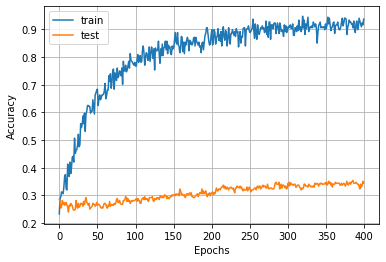

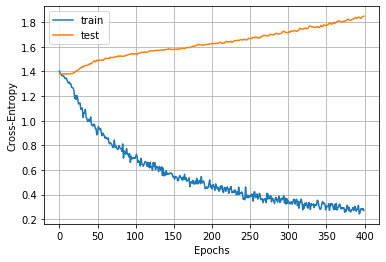

Iteration: 3
288/288 - 0s - loss: 2.0058 - acc: 0.2986
kappa:  0.06481481481481477
f1: 0.2960018070024203
confusion matrix:
 [[18 20 25  9]
 [26 15 15 16]
 [19  6 28 19]
 [15  8 24 25]]


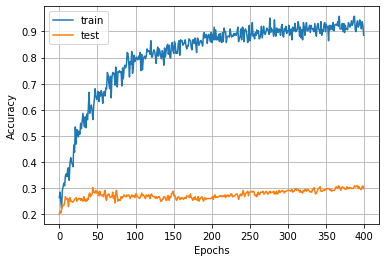

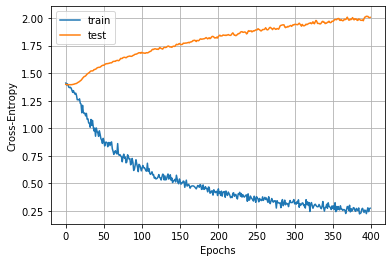

Iteration: 4
288/288 - 0s - loss: 1.7924 - acc: 0.3681
kappa:  0.15740740740740744
f1: 0.3695828024911022
confusion matrix:
 [[24 26 15  7]
 [25 25 15  7]
 [17  5 31 19]
 [18  4 24 26]]


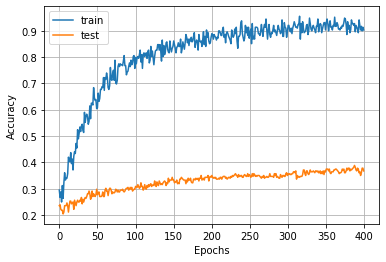

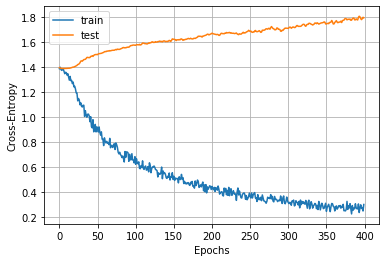

Iteration: 5
288/288 - 0s - loss: 1.6583 - acc: 0.3646
kappa:  0.1527777777777778
f1: 0.36211283898032276
confusion matrix:
 [[21 26 10 15]
 [24 29  8 11]
 [14  8 21 29]
 [13  6 19 34]]


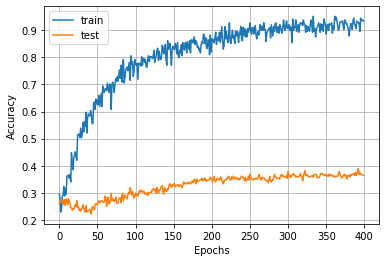

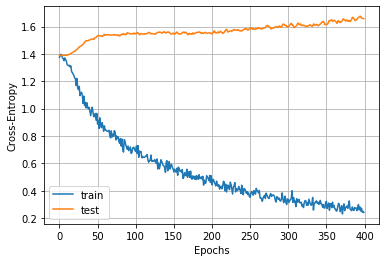


Resultados:
loss: [1.8329197433259752, 1.8485620816548665, 2.005811929702759, 1.792381034957038, 1.658334771792094]
accuracy: [0.3611111, 0.34375, 0.2986111, 0.36805555, 0.36458334]
kappa: [0.14814814814814814, 0.125, 0.06481481481481477, 0.15740740740740744, 0.1527777777777778]
f1: [0.36036869596000004, 0.3446873371347987, 0.2960018070024203, 0.3695828024911022, 0.36211283898032276]


In [0]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = CNN_1D_GRU()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_8 (TimeDist (None, None, 192, 16)     2064      
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 192, 16)     0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, None, 3072)        0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 8)                 98592     
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
Total params: 100,692
Trainable params: 100,692
Non-trainable params: 0
________________________________________________

In [0]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.3472
Mean Kappa: 0.1296
Mean F1: 0.3466
Max Accuracy: 0.3681
Max Kappa: 0.1574
Max F1: 0.3696
